<a href="https://colab.research.google.com/github/dvisionst/Regression_Metrics_Core/blob/main/Regression_Metrics_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Metrics Core

- Jose Flores
- 28 July 2022

In [1]:
# Import mandatory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression


In [2]:
# Creating Dataframe from the Housing Data

df = pd.read_csv('/content/Boston_Housing_from_Sklearn.csv')
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


## For now, you do not need to do any cleaning to this data set. You can use it "as is."

An important exploration step is to determine if there are any moderate or strong correlations in your variables.

1) Make a heatmap of the correlations.  Identify any features that have a correlation coefficient of magnitude 0.5 (could be + or -) or greater with price.   We will limit our analysis to these three features.



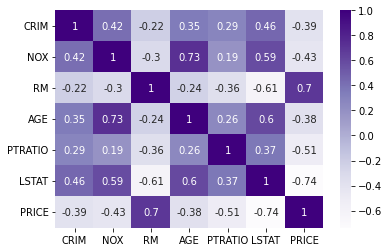

In [3]:
# creating a heat map for the data set and exploring correlation with abs(coefficiants) > 0.5

correlations = df.corr();
sns.heatmap(correlations, cmap='Purples' , annot=True);

*As can be seen in the heatmap above there are six different correlations that have a magnitude over 0.5 these are:*

1. Price and Lstat 0.74
2. Age and Nox at 0.73
3. Lstat and RM 0.61
4. Lstat and Age 0.60
5. Lstat and Nox 0.59
6. Price and Ptratio 0.51




## 2) Select columns for your feature matrix (X) and select PRICE for your target vector (y).



In [4]:
# Setting up my features matrix and my target vector

y = df['PRICE']

X = df.drop(columns='PRICE')
X.info()
# X.info() shows no missing values and that the features matrix 
# is all numerical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
dtypes: float64(6)
memory usage: 23.8 KB


## 3) Split your data into train and test groups. Please use random number 42 for consistency!


In [5]:
# Splitting data into two sets, training and testing:

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 4) Instantiate your model and fit it on the training set.



In [6]:
# Instantiating a scaler and model

scaler = StandardScaler()
lin_reg = LinearRegression()

# Creating a pipeline for the data

lin_reg_pipe = make_pipeline(scaler, lin_reg)

# Fitting to the training data

lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [7]:
# Creating Model Predictions

train_prediction = lin_reg_pipe.predict(X_train)
test_prediciton = lin_reg_pipe.predict(X_test)

## 5) Evaluate your model performance using R^2 on the training set and on the test set.  Is there a difference between model performance on the training data vs the test data?

 

In [8]:
# Using sklearn to evaulate the model performance using R^2

train_R2 = round(r2_score(y_train, train_prediction) , 3)
test_R2 = round(r2_score(y_test, test_prediciton), 3)

print(f"The R^2 value for the Training Model is: {train_R2}")
print(f"The R^2 value for the Testing Model is: {test_R2}")

The R^2 value for the Training Model is: 0.695
The R^2 value for the Testing Model is: 0.636


There is about approximately a 6% difference between the training model and the testing model R^2 scores. Which is to say that the model can account for 64% of the variation in the y_test using the features in X_test. 

## 6) Evaluate your model using mean absolute error (MAE).



In [9]:
# Using sklearn module to apply MAE metric to model 

train_MAE = round(mean_absolute_error(y_train, train_prediction), 2)
test_MAE = round(mean_absolute_error(y_test, test_prediciton), 2)
print(f"The MAE results for the training set is: {train_MAE}")
print(f"The MAE results for the testing set is: {test_MAE}")


The MAE results for the training set is: 3.67
The MAE results for the testing set is: 3.34


As can be seen in the results the MAE values are within 0.33 of each other. 
T

## 7) Evaluate your model using mean squared error (MSE).  



In [10]:
# Using sklearn module to apply MSE metric to model 

train_MSE = round(mean_squared_error(y_train, train_prediction), 2)
test_MSE = round(mean_squared_error(y_test, test_prediciton), 2)

print(f"The MSE value for the training model is {train_MSE}")
print(f"The MSE value for the testing model is {test_MSE}")

The MSE value for the training model is 27.01
The MSE value for the testing model is 25.52


## 8) Evaluate your model performance using RMSE on the training set and on the test set. This metric is useful because the units will be in the same units as your target vector. In this case 1,000 of dollars. 

In [13]:
# Using sklearn module to apply MSE metric to model 

train_RMSE = round(np.sqrt(train_MSE), 3)
test_RMSE = round(np.sqrt(test_MSE), 3)

print(f"Model for training RMSE:  {train_RMSE}")
print(f"Model for testing RMSE: {test_RMSE}")




Model for training RMSE:  5.197
Model for testing RMSE: 5.052
